# Selección de Datos

**Presentación del caso**

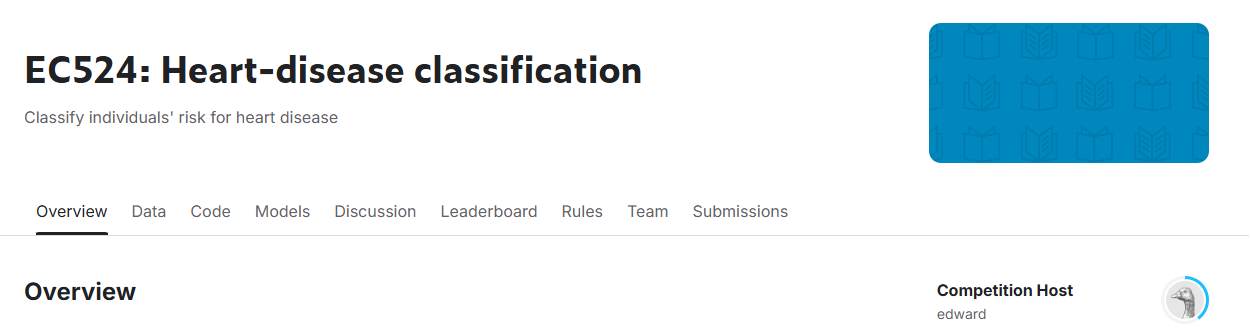

**Situación**

Las enfermedades cardiovasculares son una de las principales causas de muerte a nivel mundial. Detectar tempranamente los riesgos de sufrir una enfermedad cardíaca puede marcar la diferencia en el tratamiento y la calidad de vida de los pacientes.

El dataset Heart Disease se ha utilizado ampliamente en la investigación médica y de aprendizaje automático para comprender mejor los factores que contribuyen al desarrollo de enfermedades cardíacas. Este conjunto de datos incluye información detallada sobre pacientes, como edad, sexo, presión arterial, niveles de colesterol y resultados de electrocardiogramas en reposo, entre otros.

El objetivo principal es predecir si una persona tiene o no una enfermedad cardíaca basándose en las características del paciente. Además, este dataset también permite realizar análisis exploratorios para identificar patrones y obtener información útil para una mejor comprensión de los factores de riesgo.

**Detalle**

El dataset utilizado proviene de una [competencia de Kaggle](https://www.kaggle.com/competitions/ec524-heart-disease/data) "EC524: Heart-disease classification", la cual comprenden la base de datos de Cleveland, conocida por ser la más utilizada en investigaciones relacionadas con aprendizaje automático. Aunque originalmente incluye 76 atributos, los estudios publicados se han centrado en un subconjunto de 14 variables clave.

Las columnas (atributos) utilizadas en este dataset son las siguientes:

- **age**: Edad del paciente
- **sex**: Género del paciente
- **chest_pain**: Tipo de dolor en el pecho
- **resting_bp**: Presión arterial en reposo
- **cholesterol**: Colesterol sérico en mg/dl
- **high_sugar**: Indicador de si el azúcar en sangre en ayunas es mayor a 120 mg/dl
- **ecg**: Resultados del electrocardiograma en reposo
- **max_rate**: Frecuencia cardíaca máxima alcanzada
- **exercise_angina**: Angina inducida por ejercicio
- **st_depression**: Depresión del segmento ST inducida por ejercicio
- **slope**: Pendiente del segmento ST del ejercicio máximo
- **vessels**: Número de vasos principales coloreados en la fluoroscopia
- **thalium_scan**: Escaneo cardíaco de talio

El análisis y modelado de estos datos permitirá responder a preguntas clave como:

* ¿Cuáles son los factores más relevantes para predecir una enfermedad cardíaca?

* ¿Qué características comunes tienen las personas con mayor riesgo?


In [2]:
#importar las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import missingno as ms

In [4]:
data_train = pd.read_csv('https://raw.githubusercontent.com/vlenix2505/Heart_Disease_Prediction/refs/heads/main/train.csv')
data_train.head()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [5]:
#Cantidad de registros y atributos
data_train.shape

(228, 15)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               228 non-null    int64  
 1   age              228 non-null    int64  
 2   sex              228 non-null    int64  
 3   chest_pain       228 non-null    int64  
 4   resting_bp       228 non-null    int64  
 5   cholestoral      228 non-null    int64  
 6   high_sugar       228 non-null    int64  
 7   ecg              228 non-null    int64  
 8   max_rate         228 non-null    int64  
 9   exercise_angina  228 non-null    int64  
 10  st_depression    228 non-null    float64
 11  slope            228 non-null    int64  
 12  vessels          224 non-null    float64
 13  thalium_scan     226 non-null    float64
 14  heart_disease    228 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 26.8 KB


In [116]:
#Indicadores de las variables numéricas
data_train.describe()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,224.000000,226.000000,228.000000
mean,153.600877,54.368421,0.697368,3.157895,131.982456,248.337719,0.140351,1.026316,148.675439,0.324561,1.010526,1.596491,0.683036,4.809735,0.473684
std,85.501492,9.003928,0.460408,0.967115,17.827852,49.388909,0.348115,0.993020,23.969693,0.469241,1.146215,0.604233,0.962283,1.944586,0.500406
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,81.500000,48.000000,0.000000,3.000000,120.000000,212.750000,0.000000,0.000000,131.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,155.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.250000,60.250000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


En base a la información descrita, podemos decir lo siguiente:
* Se encuentran registros vacíos/incompleto en los campos **vessels y thalium_Scan**
* La edad media de los pacientes es de 54.37 años y la desviación estándat de 9.00
* La edad mínima es de 29 años y máxima de 77 años

In [117]:
#Evaluamos si el dataset está balanceado
data_train['heart_disease'].value_counts()

,count
heart_disease,
0,120
1,108


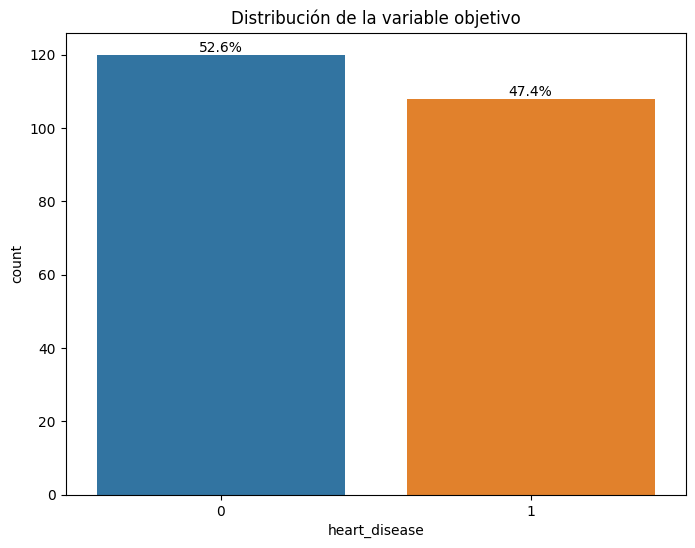

In [8]:
#Visualización de distribución de datos
plt.figure(figsize=(8,6))
sns.countplot(x='heart_disease', data=data_train, legend=False, hue = 'heart_disease')
plt.title('Distribución de la variable objetivo')
# Cálculo del porcentaje
total = len(data_train)
for bar in plt.gca().patches:
    count = bar.get_height()
    percentage = f'{(count / total) * 100:.1f}%'
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        count,
        percentage,
        ha='center', va='bottom', fontsize=10
    )
plt.show()

Observando los resultados, se verifica que la data se encuentra correctamente balanceada, ya que las proporciones entre las dos clases son similares, con un **52.6%** para la clase `0` (sin enfermedad cardíaca) y un **47.4%** para la clase `1` (con enfermedad cardíaca).

Estas proporciones están dentro de un rango aceptable (40%-60%), lo que asegura que no habrá un sesgo significativo hacia una clase durante el entrenamiento del modelo.

<Axes: title={'center': 'Histograma para edad'}, xlabel='age', ylabel='Count'>

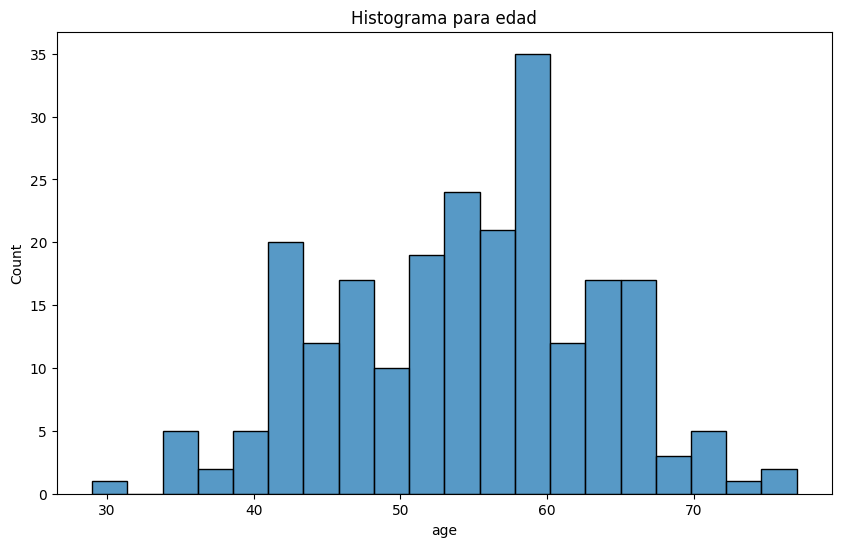

In [7]:
#Visualizar la edad
plt.figure(figsize=(10, 6))
plt.title("Histograma para edad")
sns.histplot(data=data_train, x='age', bins=20)

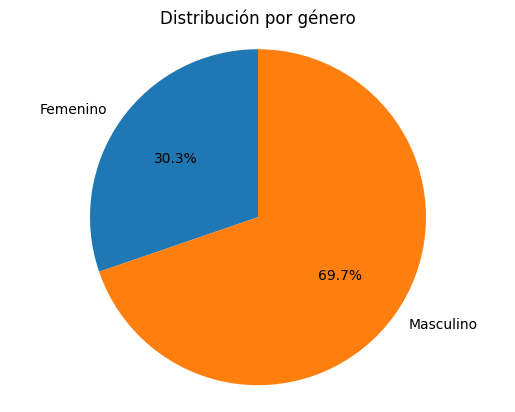

In [8]:
#Visualizar el género
genre = [len(data_train.query("sex == 0")), len(data_train.query("sex == 1"))]
labels = ['Femenino','Masculino']
plt.pie(genre, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución por género')
plt.show()


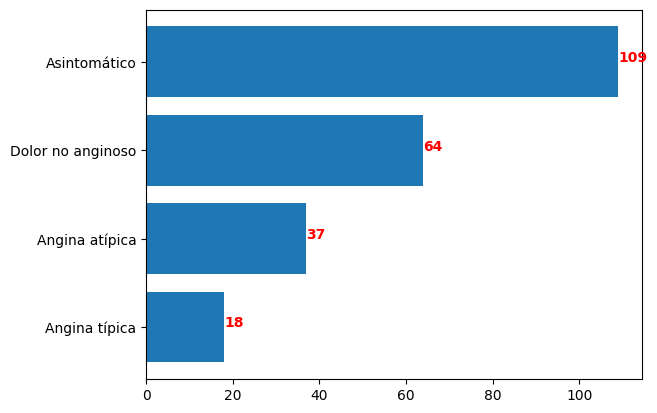

In [9]:
#Visualizar por el tipo de dolor de pecho
cantidad = [len(data_train.query("chest_pain ==1")), len(data_train.query("chest_pain ==2")), len(data_train.query("chest_pain ==3")), len(data_train.query("chest_pain ==4"))]
labels = ['Angina típica','Angina atípica','Dolor no anginoso','Asintomático']
plt.barh(labels, cantidad)
for index, valor in enumerate(cantidad):
  plt.text(valor, index, valor, color = "red", fontweight = "black")

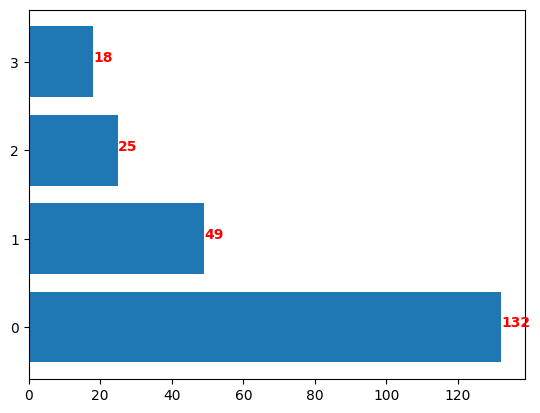

In [10]:
#Visualizar por número de vasos principales afectados
cantidad = [len(data_train.query("vessels ==0")), len(data_train.query("vessels ==1")), len(data_train.query("vessels ==2")), len(data_train.query("vessels ==3"))]
labels=['0','1','2','3']
plt.barh(labels,cantidad)
for index, valor in enumerate(cantidad):
  plt.text(valor, index, valor, color = "red", fontweight = "black")

<ipython-input-11-5eca911b1e4c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_train, x='exercise_angina', ax=ax[0], palette='Set2')
<ipython-input-11-5eca911b1e4c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_train, x='high_sugar', ax=ax[1], palette='Set2')


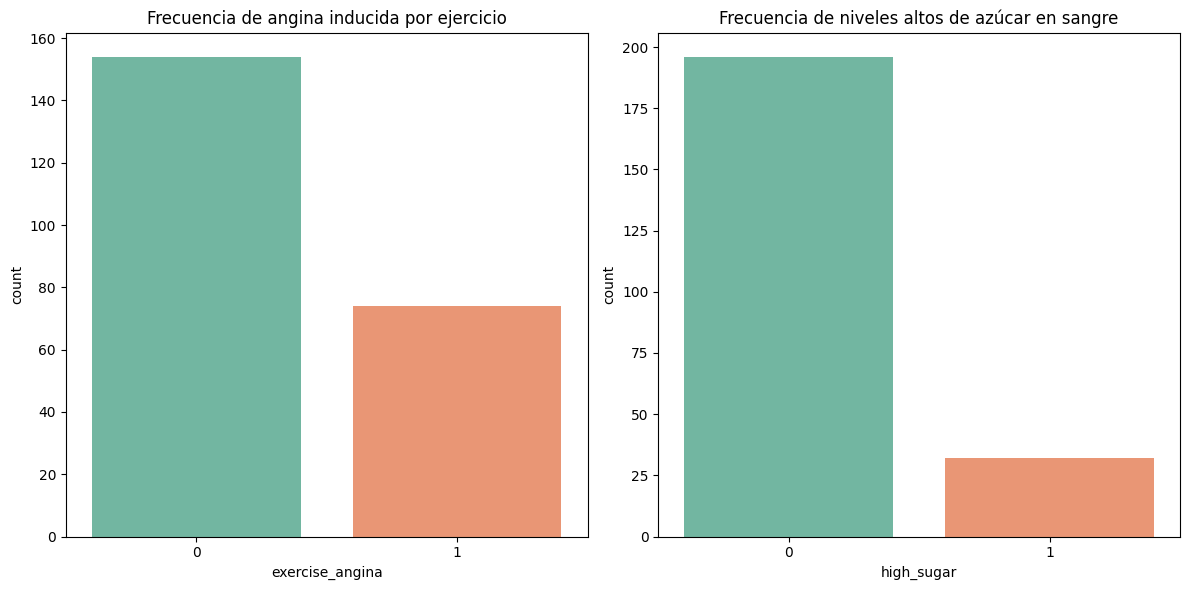

In [11]:
# Gráfico de barras para exercise_angina y high_sugar
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=data_train, x='exercise_angina', ax=ax[0], palette='Set2')
ax[0].set_title('Frecuencia de angina inducida por ejercicio')

sns.countplot(data=data_train, x='high_sugar', ax=ax[1], palette='Set2')
ax[1].set_title('Frecuencia de niveles altos de azúcar en sangre')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribución de la variable thalium_scan')

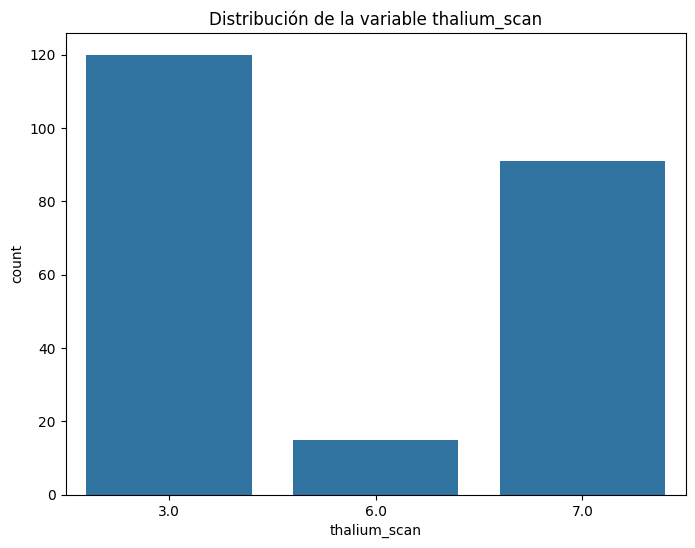

In [12]:
#Visualización de thalium_scan
plt.figure(figsize=(8,6))
sns.countplot(x='thalium_scan', data=data_train)
plt.title('Distribución de la variable thalium_scan')

Text(0.5, 1.0, 'Distribución de la variable ecg')

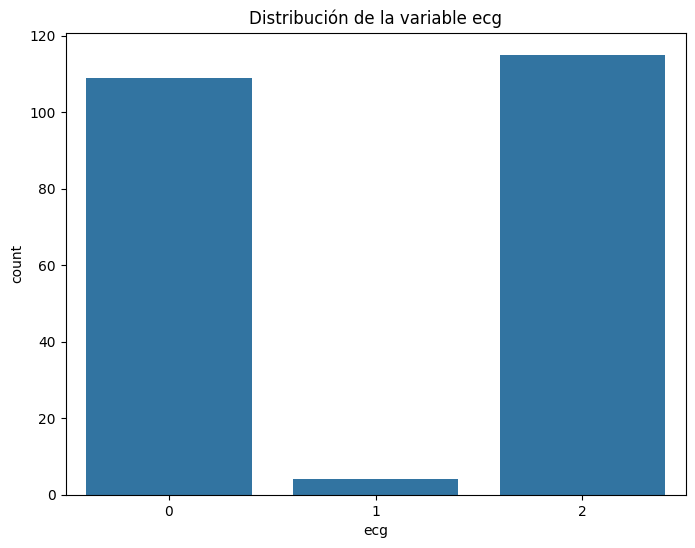

In [13]:
#Visualización de ecg
plt.figure(figsize=(8,6))
sns.countplot(x='ecg', data=data_train)
plt.title('Distribución de la variable ecg')

<Axes: title={'center': 'Histograma para resting_bp'}, xlabel='resting_bp', ylabel='Count'>

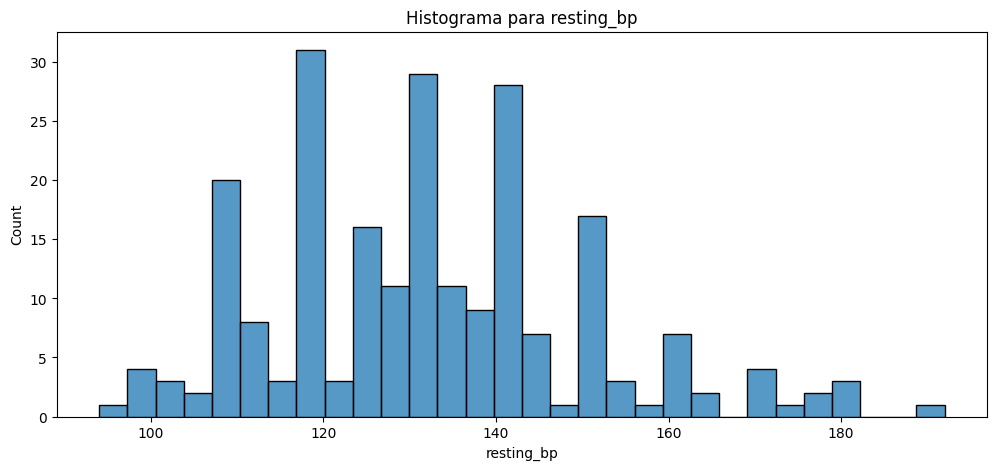

In [14]:
#Visualizar la edad
plt.figure(figsize=(12, 5))
plt.title("Histograma para resting_bp")
#Para relacionar con var objetivo: hue='heart_disease', multiple='stack'
sns.histplot(data=data_train, x='resting_bp', bins=30)

<Axes: title={'center': 'Histograma para colesterol'}, xlabel='cholestoral', ylabel='Count'>

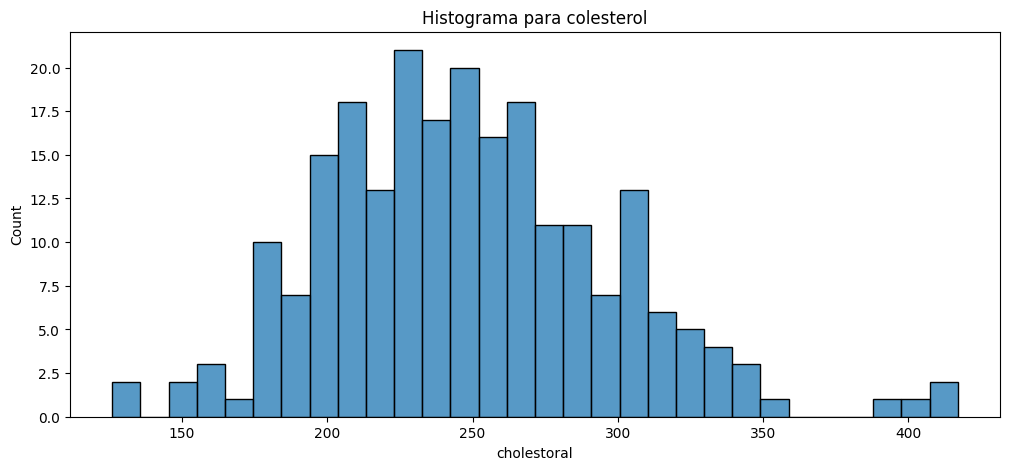

In [15]:
#Visualizar colesterol
plt.figure(figsize=(12, 5))
plt.title("Histograma para colesterol")
sns.histplot(data=data_train, x='cholestoral', bins=30)

# Pre-Procesamiento de Datos

Primero, seteamos el id con el método set_index y empezamos la etapa del pre procesamiento

In [16]:
data_train.set_index('id', inplace=True)

In [17]:
data_train.head()

,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
id,,,,,,,,,,,,,,
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


## Datos Nulos y Datos Duplicados


<Axes: >

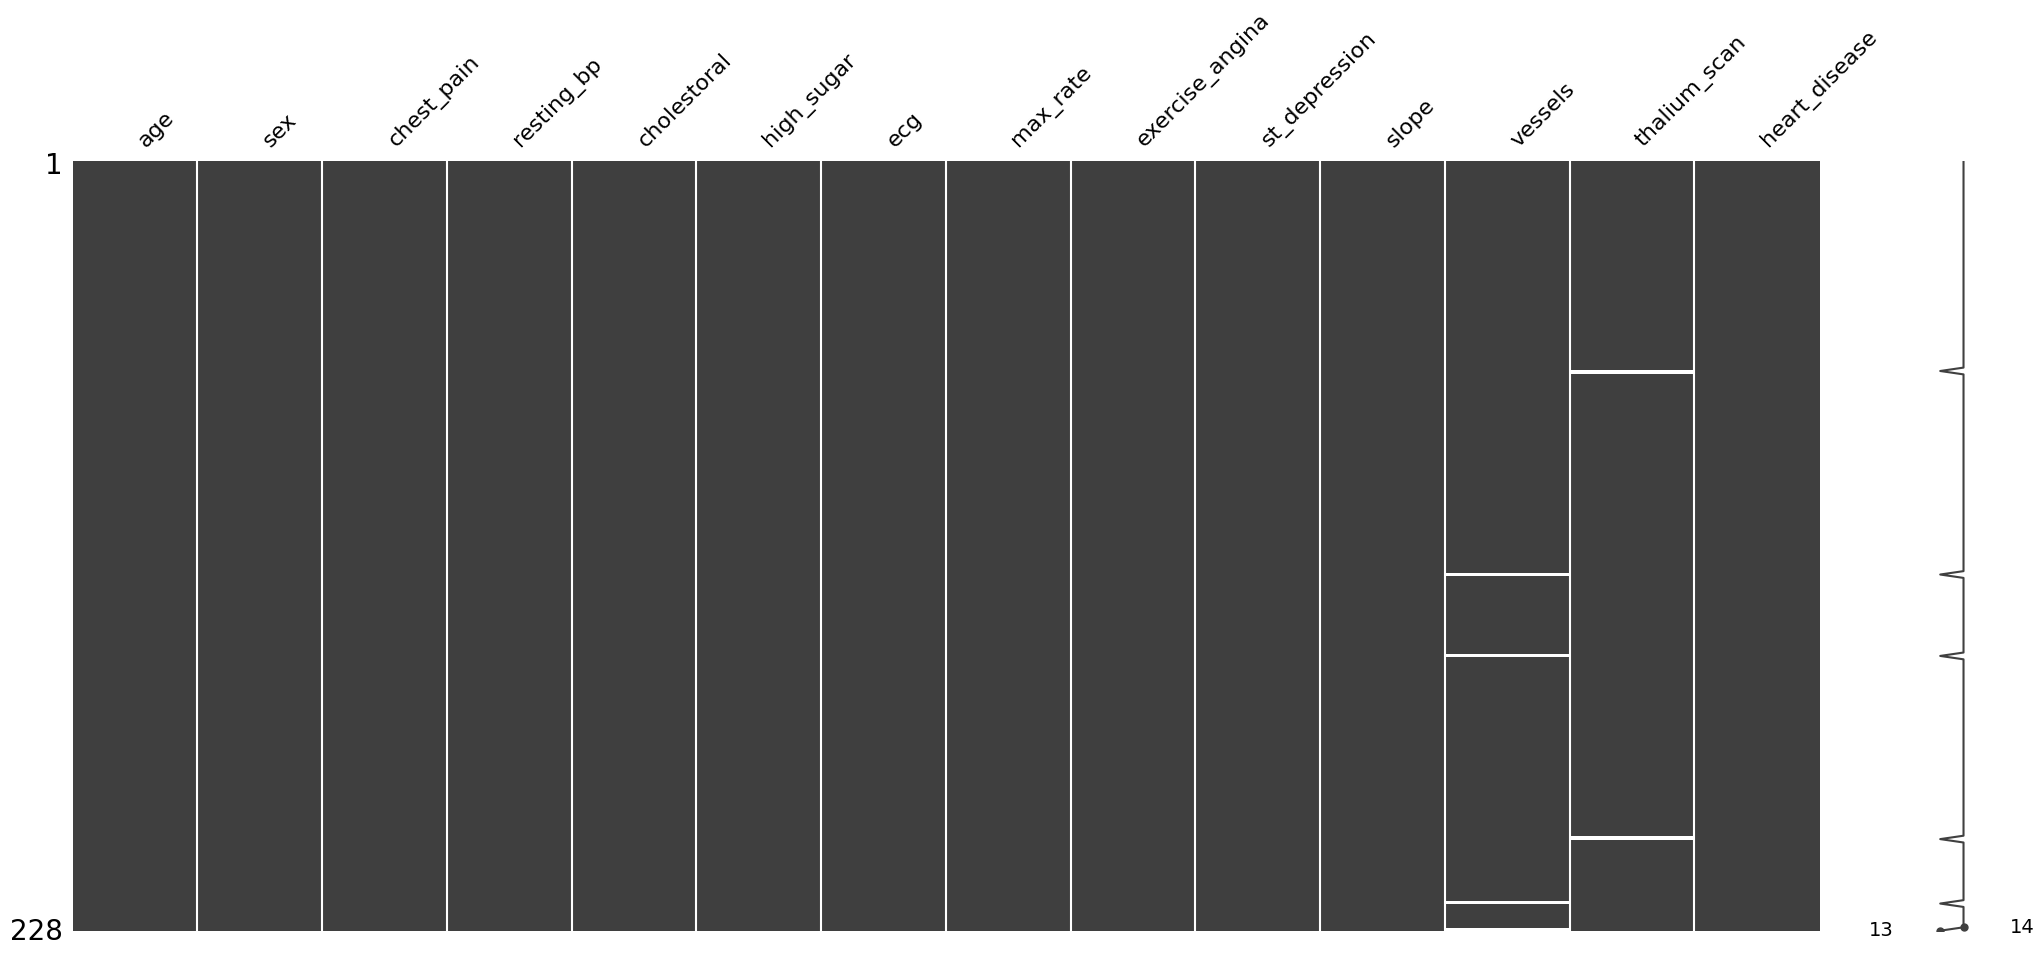

In [18]:
ms.matrix(data_train)

Se visualizan datos nulos en las columnas vessels y thalium_scan

In [19]:
data_train.isnull().sum()

,0
age,0
sex,0
chest_pain,0
resting_bp,0
cholestoral,0
high_sugar,0
ecg,0
max_rate,0
exercise_angina,0
st_depression,0


## Inputar datos

In [20]:
#Para inputar datos usaremos la moda
#Para vessels
data_train['vessels'].fillna(data_train['vessels'].mode()[0], inplace=True)
#Para thalium_scan
data_train['thalium_scan'].fillna(data_train['thalium_scan'].mode()[0], inplace=True)

<ipython-input-20-7d795a2f99a9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['vessels'].fillna(data_train['vessels'].mode()[0], inplace=True)
<ipython-input-20-7d795a2f99a9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [21]:
data_train.isnull().sum()

,0
age,0
sex,0
chest_pain,0
resting_bp,0
cholestoral,0
high_sugar,0
ecg,0
max_rate,0
exercise_angina,0
st_depression,0


## Detectando y procesando outliers

<Axes: >

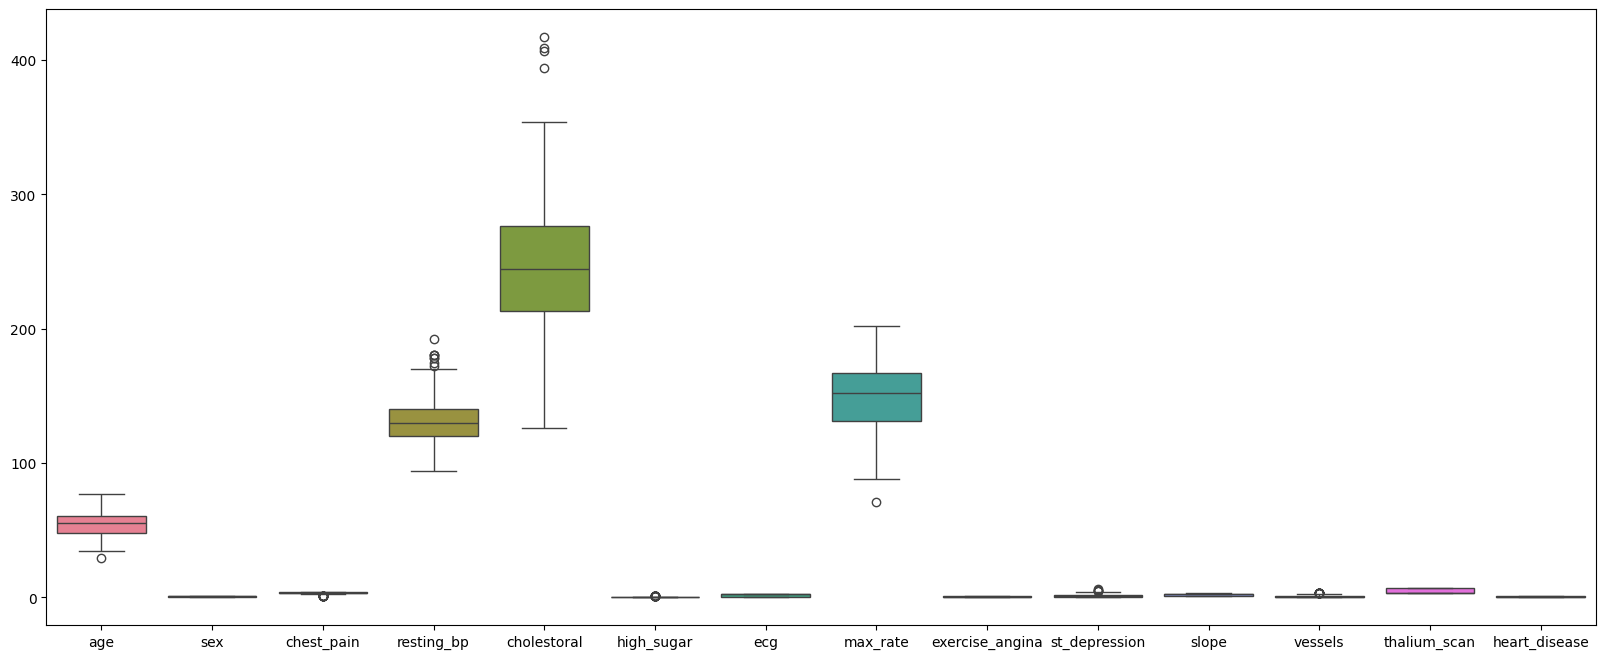

In [22]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_train)

Observando el boxplor, se muestra que los datos más alejados del resto se ubican en las variables resting_bp y cholestoral.

Procedemos a reemplazarlos con el percentil 95, ya que es una práctica recomendada para tratar estos casos.

<Axes: ylabel='resting_bp'>

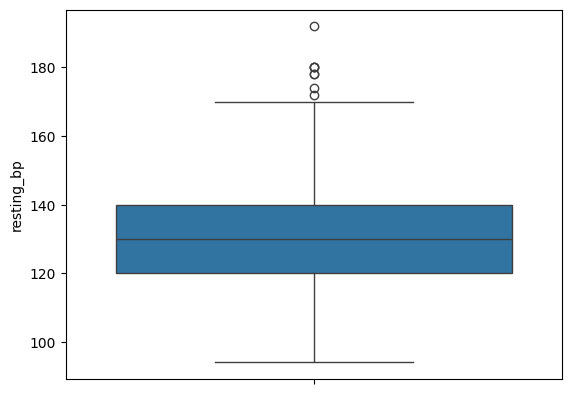

In [23]:
Resting_bp = data_train['resting_bp']
sns.boxplot(data=Resting_bp)

In [24]:
Resting_bp.value_counts()

,count
resting_bp,
120,25
140,25
130,24
110,15
150,12
128,10
138,9
112,8
125,8


In [25]:
#Ubicamos las filas superiores del P95
outliers = data_train[data_train['resting_bp']> data_train['resting_bp'].quantile(.95)].index
#Reemplazar los outliers por el P95
data_train.loc[outliers, 'resting_bp'] = data_train['resting_bp'].quantile(.95)

<ipython-input-25-dd89af1248fb>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '164.64999999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_train.loc[outliers, 'resting_bp'] = data_train['resting_bp'].quantile(.95)


In [26]:
data_train['resting_bp'].describe()

,resting_bp
count,228.000000
mean,131.398246
std,16.436865
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,164.650000


<Axes: ylabel='cholestoral'>

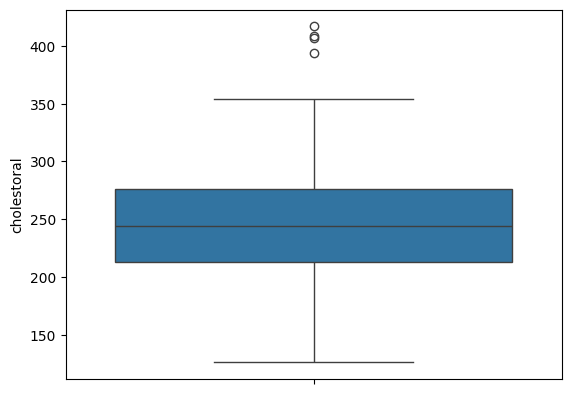

In [27]:
Cholestoral = data_train['cholestoral']
sns.boxplot(data=Cholestoral)

In [28]:
#Ubicamos las filas superiores del P95
outliers = data_train[data_train['cholestoral']> data_train['cholestoral'].quantile(.95)].index
#Reemplazar los outliers por el P95
data_train.loc[outliers, 'cholestoral'] = data_train['cholestoral'].quantile(.95)

<ipython-input-28-e6f1d7da6478>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328.94999999999993' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_train.loc[outliers, 'cholestoral'] = data_train['cholestoral'].quantile(.95)


## Feature Engineering


En el análisis del conjunto de datos, hemos identificado dos variables categóricas que podrían simplificarse para una mejor interpretación y uso en modelos predictivos. Estas variables son **vessels** y **thalium_scan**, las cuales presentan categorías que pueden ser agrupadas en valores binarios.

* **vessels**: Esta variable indica la cantidad de vasos sanguíneos afectados, con valores que van de 0 a 3. El valor 0 representa la ausencia de vasos afectados, mientras que los valores 1, 2 y 3 indican que hay al menos un vaso afectado. Debido a que la categoría "0" tiene un número significativamente mayor de registros, hemos decidido agrupar estas categorías en dos grupos binarios:

  * vessels_binary: 0 = No hay vasos afectados, 1 = Al menos un vaso afectado.

* **thalium_scan**: Esta variable describe los resultados de una prueba de talio en el corazón, con valores 3 (normal), 6 (defecto fijo) y 7 (defecto reversible). En lugar de mantener estos valores, hemos optado por simplificarlos en dos categorías que indiquen la gravedad del defecto:

  * thalium_scan_binary: 0 = Prueba normal, 1 = Defecto (fijo o reversible).

Estas transformaciones permiten un análisis más sencillo y proporcionan variables binarias que podrían ser mejor comprendidas por los modelos predictivos, ayudando a mejorar el rendimiento y la interpretabilidad del modelo.

In [29]:
# Crear una nueva columna 'vessels_binary' en el DataFrame
data_train['vessels_binary'] = data_train['vessels'].apply(lambda x: 0 if x == 0 else 1)

In [30]:
# Crear una nueva columna 'thalium_scan_binary' en el DataFrame
data_train['thalium_scan_binary'] = data_train['thalium_scan'].apply(lambda x: 0 if x == 3 else 1)

In [31]:
# Crear una nueva columna 'ecg_binary' en el DataFrame
data_train['ecg_binary'] = data_train['ecg'].apply(lambda x: 0 if x == 0 else 1)

In [32]:
data_train.head()

,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease,vessels_binary,thalium_scan_binary,ecg_binary
id,,,,,,,,,,,,,,,,,
1,63,1,1,145.0,233.0,1,2,150,0,2.3,3,0.0,6.0,0,0,1,1
2,67,1,4,160.0,286.0,0,2,108,1,1.5,2,3.0,3.0,1,1,0,1
3,67,1,4,120.0,229.0,0,2,129,1,2.6,2,2.0,7.0,1,1,1,1
5,41,0,2,130.0,204.0,0,2,172,0,1.4,1,0.0,3.0,0,0,0,1
6,56,1,2,120.0,236.0,0,0,178,0,0.8,1,0.0,3.0,0,0,0,0


##Verificar la influencia de la variable con el target

¿Influye el género del paciente con el valor de la columna Heart Disease?

In [48]:
data = data_train.copy()

<ipython-input-34-c7c8d094cabf>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['Femenino', 'Masculino'])


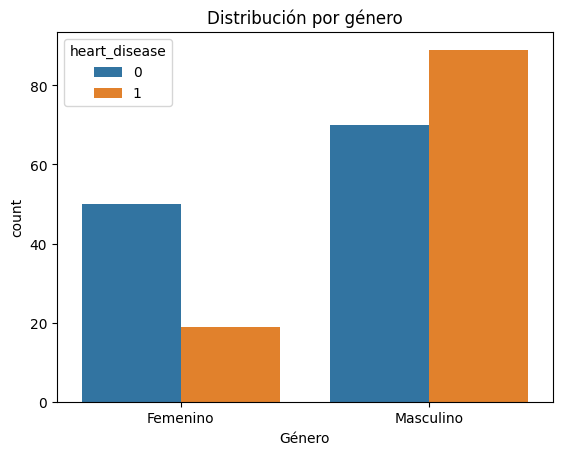

In [34]:
plot = sns.countplot(x='sex', data=data, hue='heart_disease')
plt.title('Distribución por género')
plot.set_xticklabels(['Femenino', 'Masculino'])
plt.xlabel('Género')
plt.show()

* Se observa que la mayoría de personas del género Femenino no sufrió de un ataque cardiaco.
* Se observa que las personas del género masculino sufrieron más de ataques cardiacos.

¿Influye el tipo de dolor de pecho con el valor de la columna Heart Disease?

<ipython-input-35-489deccc9f3b>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['Angina típica', 'Angina atípica', 'Dolor no anginoso', 'Asintomático'])


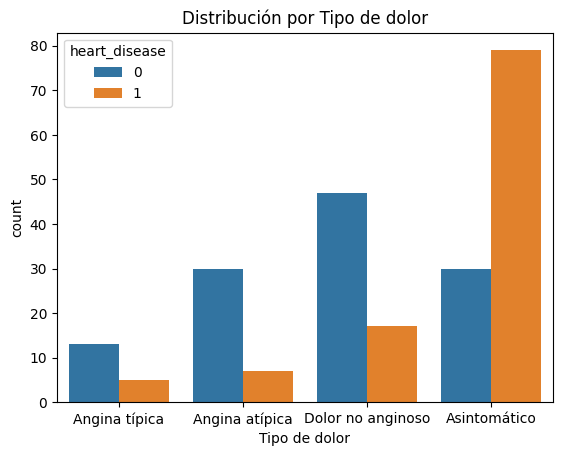

In [35]:
plot = sns.countplot(x='chest_pain', data=data, hue='heart_disease')
plt.title('Distribución por Tipo de dolor')
plot.set_xticklabels(['Angina típica', 'Angina atípica', 'Dolor no anginoso', 'Asintomático'])
plt.xlabel('Tipo de dolor')
plt.show()

* Se observa que la mayoría de personas asintomáticas sufrió de un ataque cardiaco.
* Se observa que para el resto de observaciones, los ataques cardiacos fueron de poca frecuencia.

¿Influye el resultado de electrocardiograma con el valor de la columna Heart Disease?

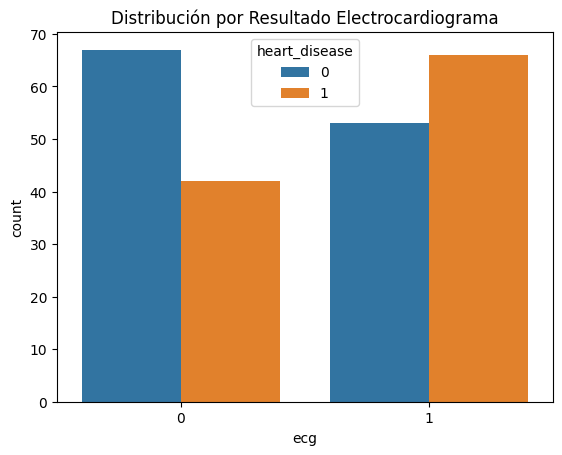

In [36]:
plot = sns.countplot(x='ecg_binary', data=data, hue='heart_disease')
plt.title('Distribución por Resultado Electrocardiograma')
plt.xlabel('ecg')
plt.show()

* Se observa que los resultados normales en electrocardiograma no conllevan en su mayoría a ataques cardiacos.
* Se observa que los resultados anormales de electrocardiograma tienen una tendencia a sufrir de un ataque cardiaco.

¿Influye el número de vasos afectados con el valor de la columna Heart Disease?

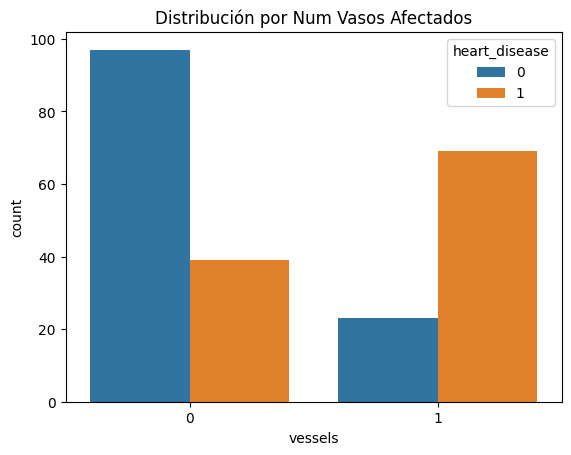

In [37]:
plot = sns.countplot(x='vessels_binary', data=data, hue='heart_disease')
plt.title('Distribución por Num Vasos Afectados')
plt.xlabel('vessels')
plt.show()

* Se observa que a mayor número de vasos afectados, mayor fue la tendencia a padecer de una ataque cardiaco.

¿Influye el resultado de una prueba de talio con el valor de la columna Heart Disease?

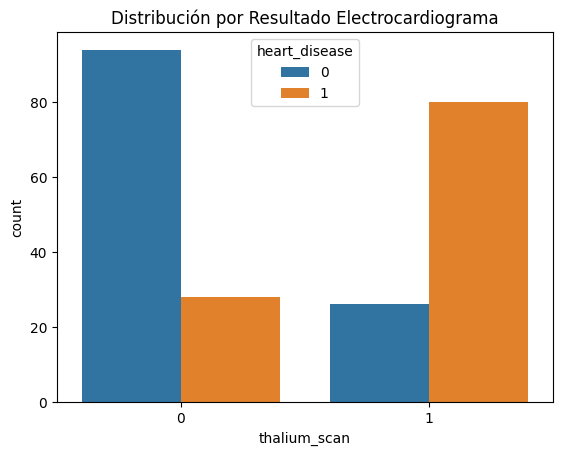

In [38]:
plot = sns.countplot(x='thalium_scan_binary', data=data, hue='heart_disease')
plt.title('Distribución por Resultado Electrocardiograma')
plt.xlabel('thalium_scan')
plt.show()

* Se observa que los resultados normales en las pruebas de talio no conllevan en su mayoria a padecer de un ataque cardiaco.
* Los resultados fijos y reversibles conducen notablemente a padecer un ataque cardiaco.

## Correlaciones entre datos

<Axes: >

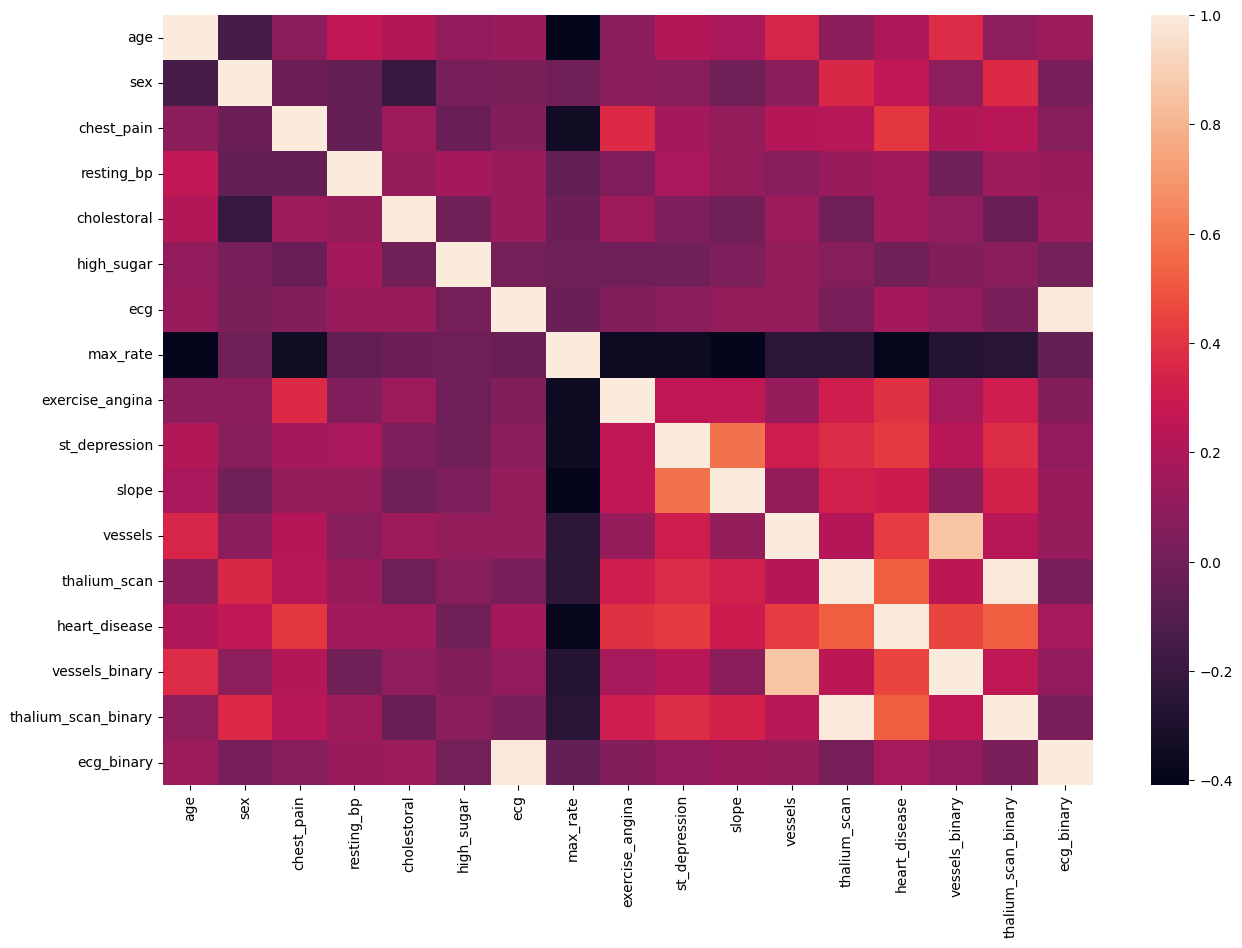

In [39]:
corr_ = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_)

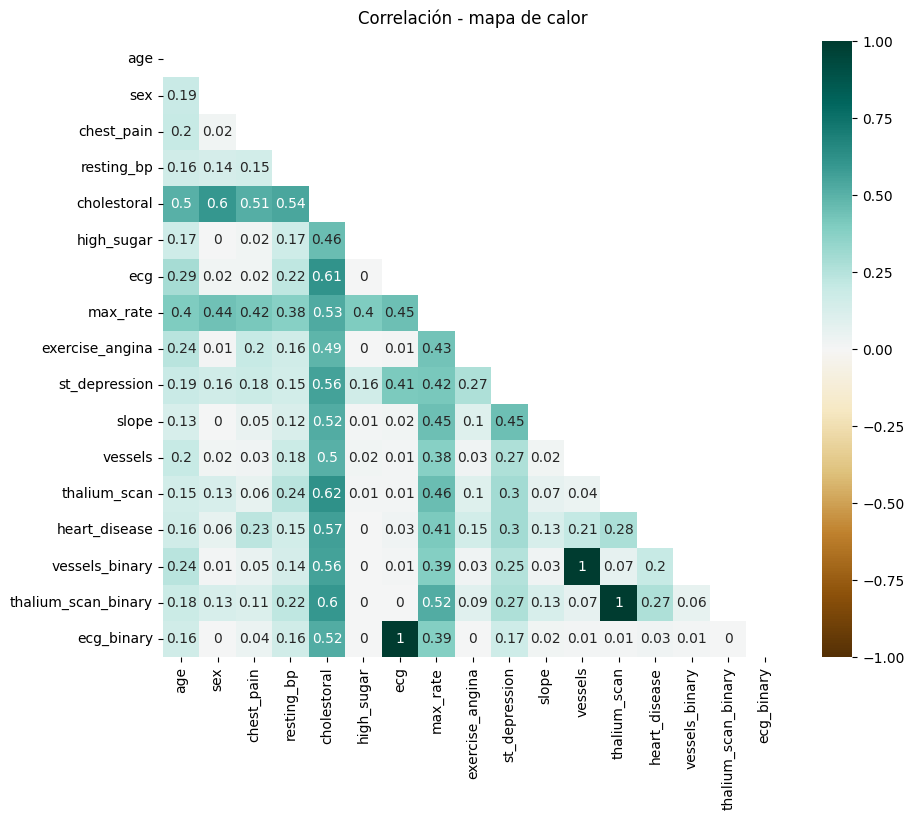

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Definición de la función cramers_V
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1
    return (stat / (obs * mini))

# Crear la matriz de resultados de Cramér V
rows = []

for var1 in data:
    col = []
    for var2 in data:
        cramers = cramers_V(data[var1], data[var2])
        col.append(round(cramers, 2))
    rows.append(col)

cramers_results = np.array(rows)
cramerv_matrix = pd.DataFrame(cramers_results, columns=data.columns, index=data.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=bool))  # Aquí se usa 'bool' en lugar de 'np.bool'

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlación - mapa de calor', fontdict={'fontsize': 12}, pad=12)
plt.show()


Viendo que existen correlaciones entre algunas columnas, nos quedaremos con las que nos aporten mayor información (vessels_binary, ecg_binary y thalium_scan_binary)

In [49]:
data.drop(['vessels','ecg','thalium_scan'],axis=1, inplace=True)

Factor de Inflación de la Varianza

In [50]:
# VIF
# >10 se recomienda no tratar dicho campo
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calcular_vif(dataframe):

    X = add_constant(dataframe)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i + 1) for i in range(dataframe.shape[1])]

    return vif_data

predictoras = data.drop(columns=["heart_disease"])
vif_resultados = calcular_vif(predictoras)
vif_resultados

,Feature,VIF
0,age,1.562527
1,sex,1.280412
2,chest_pain,1.310442
3,resting_bp,1.188730
4,cholestoral,1.158430
5,high_sugar,1.047469
6,max_rate,1.679639
7,exercise_angina,1.354898
8,st_depression,1.701384
9,slope,1.718219


In [51]:
data.head()

,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,max_rate,exercise_angina,st_depression,slope,heart_disease,vessels_binary,thalium_scan_binary,ecg_binary
id,,,,,,,,,,,,,,
1,63,1,1,145.0,233.0,1,150,0,2.3,3,0,0,1,1
2,67,1,4,160.0,286.0,0,108,1,1.5,2,1,1,0,1
3,67,1,4,120.0,229.0,0,129,1,2.6,2,1,1,1,1
5,41,0,2,130.0,204.0,0,172,0,1.4,1,0,0,0,1
6,56,1,2,120.0,236.0,0,178,0,0.8,1,0,0,0,0


## Normalizando data

<ipython-input-44-edc14836a76b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['resting_bp'])


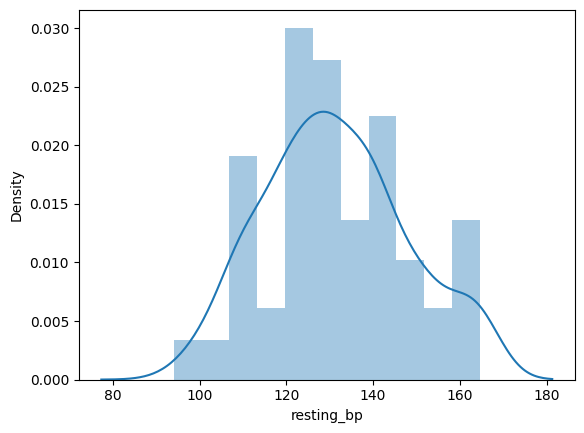

<ipython-input-44-edc14836a76b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cholestoral'])


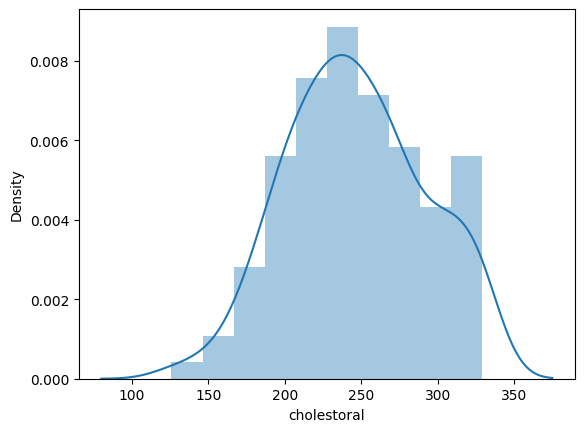

<ipython-input-44-edc14836a76b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['st_depression'])


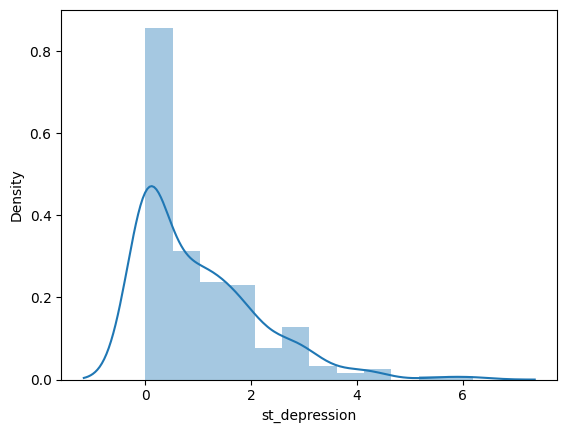

<ipython-input-44-edc14836a76b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


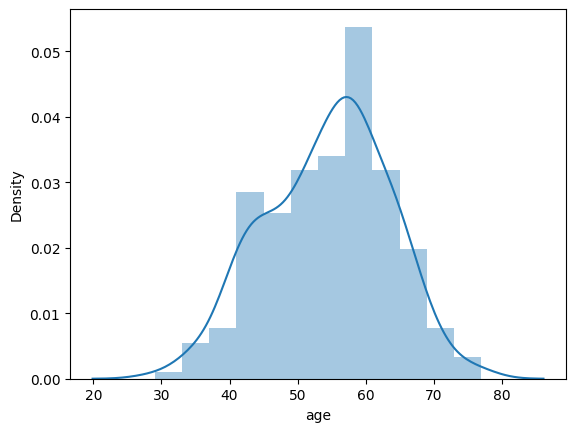

<ipython-input-44-edc14836a76b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['max_rate'])


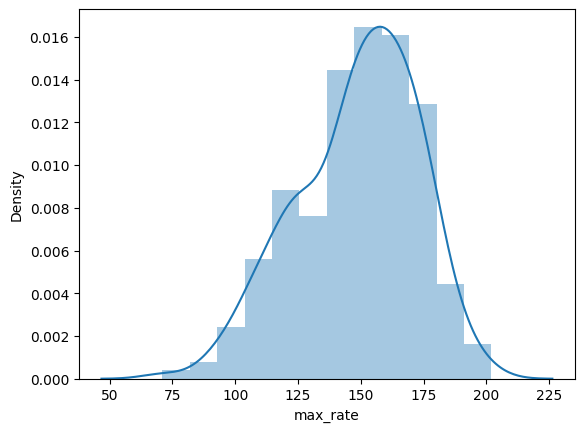

In [44]:
sns.distplot(data['resting_bp'])
plt.show()
sns.distplot(data['cholestoral'])
plt.show()
sns.distplot(data['st_depression'])
plt.show()
sns.distplot(data['age'])
plt.show()
sns.distplot(data['max_rate'])
plt.show()

**Justificación de la normalización**

* st_depression: Tiene un rango amplio (cola larga), y normalizarla puede mejorar la estabilidad en el modelo.
* resting_bp y cholestoral: Ambos tienen valores altos y diferentes escalas, lo cual podría sesgar los cálculos si no se normalizan.
* age: Aunque es menos crítico, normalizar la edad puede ayudar si otros valores están en un rango muy distinto.
* max_rate: Esta variable está relacionada con la frecuencia cardíaca máxima, y su rango también es considerablemente diferente al de otras variables binarias.

In [45]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Seleccionamos las columnas a normalizar
columns_to_normalize = ['age', 'resting_bp', 'cholestoral', 'max_rate', 'st_depression']
scaler = MinMaxScaler()

# Normalizamos las columnas y las actualizamos en el DataFrame
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [53]:
data.head()

,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,max_rate,exercise_angina,st_depression,slope,heart_disease,vessels_binary,thalium_scan_binary,ecg_binary
id,,,,,,,,,,,,,,
1,0.708333,1,1,0.721868,0.527223,1,0.603053,0,0.370968,3,0,0,1,1
2,0.791667,1,4,0.934183,0.788372,0,0.282443,1,0.241935,2,1,1,0,1
3,0.791667,1,4,0.368011,0.507514,0,0.442748,1,0.419355,2,1,1,1,1
5,0.250000,0,2,0.509554,0.384331,0,0.770992,0,0.225806,1,0,0,0,1
6,0.562500,1,2,0.368011,0.542005,0,0.816794,0,0.129032,1,0,0,0,0


In [54]:
#Guardamos la data pre-procesada
data.to_csv('data_preprocesada.csv')

# Transformación de Datos

In [55]:
train = pd.read_csv('data_preprocesada.csv')

In [56]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = train.drop('heart_disease', axis=1)
y = train['heart_disease']


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [58]:
#Mostramos con el parámetro shape la cantidad de filas que resultaron en cada parte
print('Para el X_train:', X_train.shape, 'y para el y_train',y_train.shape)
print('Para el X_test:',X_test.shape,'y para el y_test',y_test.shape)

Para el X_train: (182, 14) y para el y_train (182,)
Para el X_test: (46, 14) y para el y_test (46,)


# Minería de Datos

In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix

#Modelo XGBoost con hiperparámetros ajustados a las características del dataset
xgb = XGBClassifier(
    n_estimators=50,          #Menor número de árboles para evitar sobreajuste
    max_depth=3,              #Árboles más simples para datos pequeños
    learning_rate=0.1,        #Tasa de aprendizaje moderada
    subsample=0.8,            #Fracción del dataset usada en cada árbol
    colsample_bytree=0.8,     #Fracción de características usadas en cada árbol
    reg_alpha=0.1,
    reg_lambda=1.0,
    eval_metric="logloss",    #Métrica para clasificación binaria
    use_label_encoder=False,
    random_state=42
)

#Entrenamos el modelo
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:32:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Evaluación del modelo

Accuracy: 0.8478260869565217
AUC-Score: 0.8750000000000001
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.86      0.82      0.84        22

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46



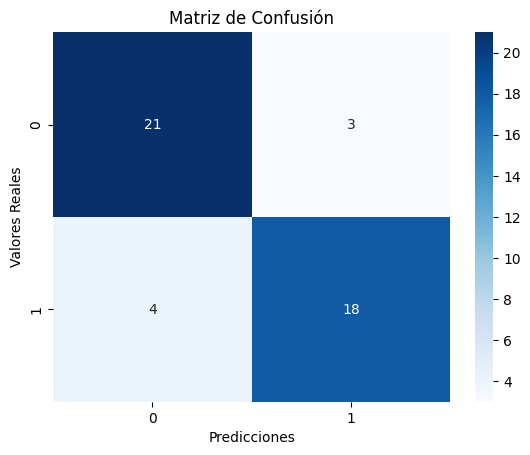

In [60]:
# Evaluar en el conjunto de prueba
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-Score:", roc_auc_score(y_test, y_pred_proba))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

Análisis de las métricas para el presente modelo:
* **Accuracy**. El modelo predijo correctamente en el 85% de los casos.
* **F1-Score**: Para ambas clases, los valores son similares, lo que muestra que el modelo tiene un rendimiento consistente.

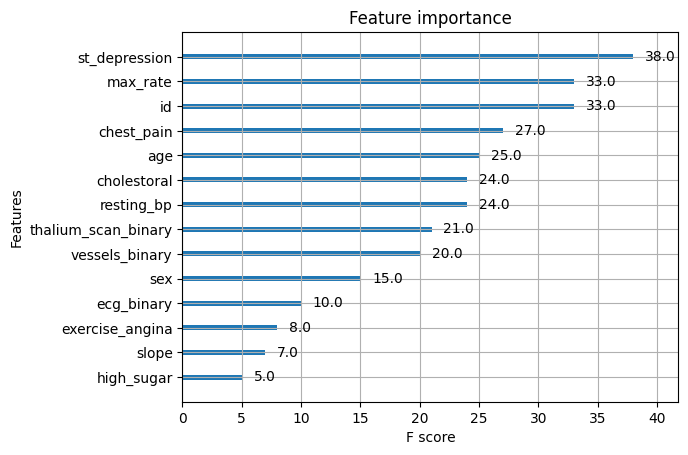

In [156]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb)
plt.show()


##Curva ROC

Parámetros de la curva ROC

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predecir las probabilidades de la clase positiva
y_probs = xgb.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
print('roc_auc_score XGBoost:', roc_auc)

roc_auc_score XGBoost: 0.8750000000000001


Gráfica de la curva ROC

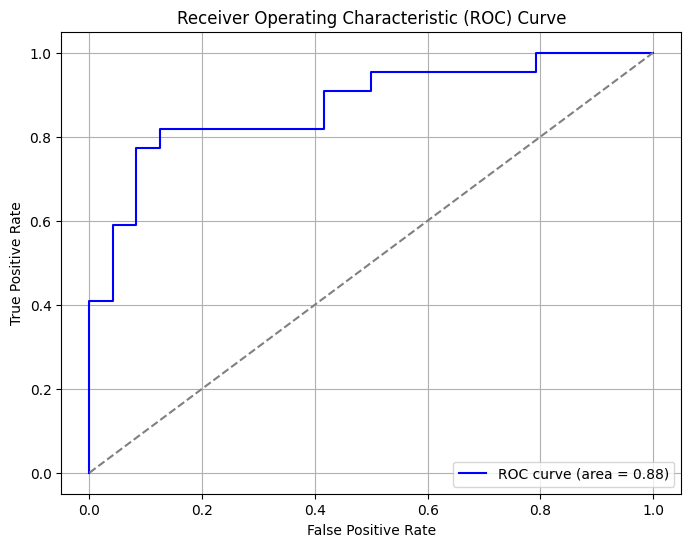

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

La gráfica ROC (Receiver Operating Characteristic) muestra la capacidad de discriminación de nuestro modelo Random Forest.

La curva azul representa la relación entre la Tasa de Verdaderos Positivos (True Positive Rate) y la Tasa de Falsos Positivos (False Positive Rate) en diferentes umbrales de decisión.

**El AUC (Área Bajo la Curva) de 0.88** indica que nuestro modelo tiene un buen rendimiento en la clasificación, distinguiendo correctamente entre clases positivas y negativas la mayor parte del tiempo.

# Enviando a competencia de Kaggle

In [61]:
test_data = pd.read_csv('https://raw.githubusercontent.com/vlenix2505/Heart_Disease_Prediction/refs/heads/main/test_preprocesado.csv')
test_data.drop(['Unnamed: 0'], axis = 1,inplace=True)
test_data.head()

,id,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,max_rate,exercise_angina,st_depression,slope,vessels_binary,thalium_scan_binary,ecg_binary
0,179,0.222222,1,3,0.545455,0.981387,0,0.728261,0,0.475,1,1,0,0
1,14,0.250000,1,2,0.393939,0.688099,0,0.847826,0,0.000,1,0,1,0
2,195,0.916667,0,3,0.393939,0.394811,0,0.217391,0,0.375,2,0,0,1
3,118,0.000000,0,4,0.666667,0.236887,0,0.945652,0,0.350,1,0,0,0
4,299,0.277778,1,1,0.242424,0.693739,0,0.402174,0,0.300,2,0,1,0


In [ ]:
#Guardar resultados en csv
y_pred = xgb.predict(test_data)
results = pd.DataFrame({
    'id': test_data['id'],
    'heart_disease': y_pred
})

results.to_csv('predicciones_xgb.csv', index=False)


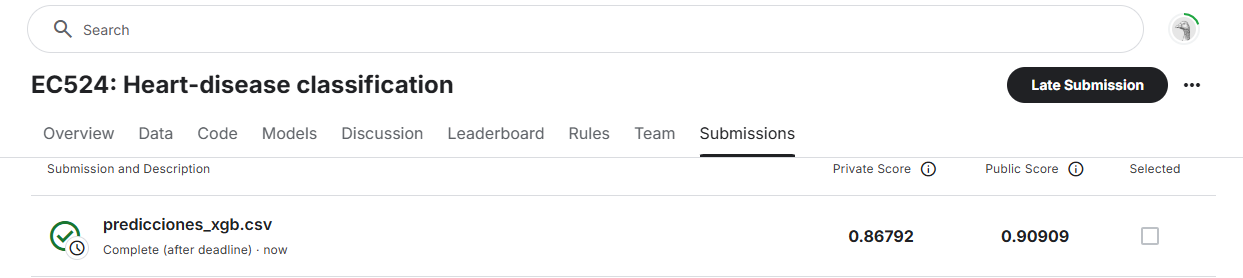